In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
d = datasets.load_breast_cancer()
x, y = d.data, d.target

In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)

In [9]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate output variable (y) with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) #derivative w.r.t weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  #derivative w.r.t bias
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [59]:
itr=[]
acc=[]

In [68]:
regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(xtrain, ytrain)
predictions = regressor.predict(xtest)
itr.append(1000)

In [69]:
print("LR classification accuracy:", accuracy(ytest, predictions))
acc.append(accuracy(ytest, predictions))

LR classification accuracy: 0.9210526315789473


In [70]:
regressor.weights

array([ 3.80309926e-02,  3.30401957e-02,  2.10111513e-01,  7.60120291e-02,
        2.73944594e-04, -4.88628273e-04, -1.12782000e-03, -4.44770888e-04,
        5.55108215e-04,  2.41467041e-04,  1.73432715e-04,  2.53302654e-03,
       -2.95955671e-03, -1.01118209e-01,  6.23560578e-06, -1.45982638e-04,
       -2.04940221e-04, -3.87305211e-05,  4.74461505e-05, -6.44350890e-06,
        4.02813092e-02,  3.65581439e-02,  1.98560048e-01, -1.10069309e-01,
        2.83057021e-04, -1.89564898e-03, -2.86223688e-03, -6.82335935e-04,
        6.37610957e-04,  1.18927123e-04])

In [71]:
regressor.bias

0.004978014908465571

Text(0, 0.5, 'Accuracy')

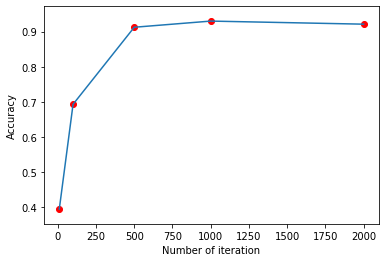

In [78]:
plt.scatter(itr,acc,color="r")
plt.plot(itr,acc)
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")